<a href="https://colab.research.google.com/github/Amitabh-Phule/Machine-Learning/blob/main/Exp5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

### Data Loading and Preprocessing

In [ ]:
# 1. Load Dataset - Using already loaded df from previous execution
# df = pd.read_csv('/content/drive/MyDrive/ML/test.csv.csv') # Removed this line
# df.head() # Removed this line as df is already loaded
iris = load_iris()
X = iris.data
y = iris.target

# 2. Preprocessing - Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split Data

In [ ]:
# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Experiment with different K values

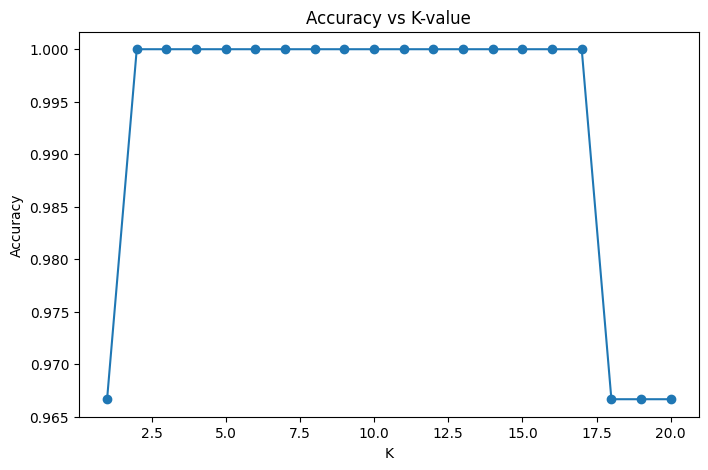

In [ ]:
# 4. Experiment with different K values
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracies, marker='o')
plt.title("Accuracy vs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

### Decision Boundary Visualization (using PCA to 2D)

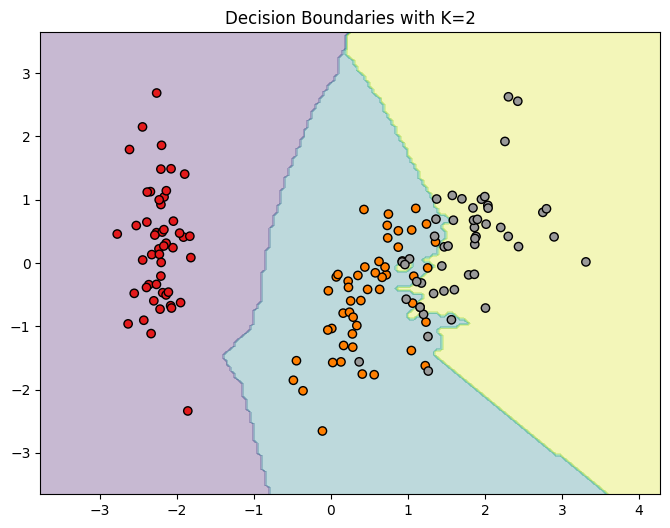

In [ ]:
# 5. Decision Boundary Visualization (using PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

best_k = np.argmax(accuracies) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train_pca)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.title(f"Decision Boundaries with K={best_k}")
plt.show()

### Evaluate Best Model

Best K: 2
Best Accuracy: 0.9333


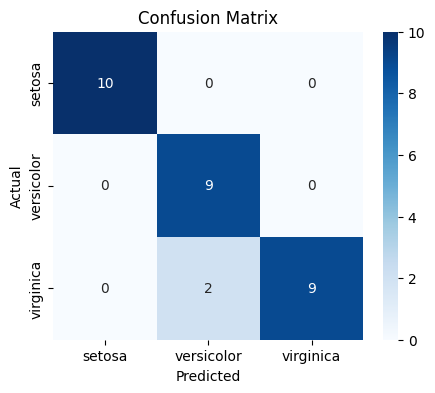

In [ ]:
# 6. Evaluate Best Model
y_pred_best = knn_best.predict(X_test_pca)
cm = confusion_matrix(y_test_pca, y_pred_best)
acc_best = accuracy_score(y_test_pca, y_pred_best)

print(f"Best K: {best_k}")
print(f"Best Accuracy: {acc_best:.4f}")

# Confusion Matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()